In [ ]:
#The dataset used is from UCI Machine Learning Repository
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
#The goal is to predict whether income exceeds $50K/yr.
#The target or dependent variable here is "Income"
#The other features are the independent variables: Age, work_class, fnlwgt, education, edu_num, Marital status, occupation, 
#relationship, race, sex, capital gain, capital loss, hours per week, and native country. 
#In total we have 14 features or independent variables and 1 target or dependent variable (Income). 
#Prediction Task: Whether a person makes over 50K a year.

In [4]:
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [211]:
# summarize the adult dataset
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]
df = pd.read_csv(url, header=None, names=columns, na_values=' ?')
# summarize the first few rows
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
#Split data
target_var='income'
X=df.loc[:,df.columns!= target_var]
y= df.loc[:,df.columns == target_var]

In [7]:
X

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [8]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [19]:
#Question 1
#For each column in the dataset:
#a. (Using Python) Develop the module that identifies.
#i. missing data

#summarize the number of rows with missing values for each column
for i in df.columns:
    # count number of rows with missing values
    n_miss = df[i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Age, Missing: 0 (0.0%)
> work_class, Missing: 1836 (5.6%)
> fnlwgt, Missing: 0 (0.0%)
> education, Missing: 0 (0.0%)
> edu_num, Missing: 0 (0.0%)
> M_status, Missing: 0 (0.0%)
> occupation, Missing: 1843 (5.7%)
> relationship, Missing: 0 (0.0%)
> race, Missing: 0 (0.0%)
> sex, Missing: 0 (0.0%)
> capital_G, Missing: 0 (0.0%)
> capital_L, Missing: 0 (0.0%)
> H_per_week, Missing: 0 (0.0%)
> N_country, Missing: 583 (1.8%)
> income, Missing: 0 (0.0%)


In [20]:
from numpy import mean, std, percentile
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

In [22]:
#Question1
#For each column in the dataset:
#a. (Using Python) Develop the module that identifies.
#ii.outlier data

c=["Age", "fnlwgt", "edu_num", "capital_G", "capital_L","H_per_week"]
#Method1: outliers using z-score
from scipy.stats import zscore

# Calculate Z-scores
z_s = df[c].apply(zscore)

# Use Z zcore
outliers_zscore = df[(z_s.abs() > 3).any(axis=1)]
print("Outliers detected by Z-score method:")
print(z_s.head())
z_spercent = len(outliers_zscore) / len(df) * 100
print("Percent using Z-score method:", z_spercent)

Outliers detected by Z-score method:
        Age    fnlwgt   edu_num  capital_G  capital_L  H_per_week
0  0.030671 -1.063611  1.134739   0.148453   -0.21666   -0.035429
1  0.837109 -1.008707  1.134739  -0.145920   -0.21666   -2.222153
2 -0.042642  0.245079 -0.420060  -0.145920   -0.21666   -0.035429
3  1.057047  0.425801 -1.197459  -0.145920   -0.21666   -0.035429
4 -0.775768  1.408176  1.134739  -0.145920   -0.21666   -0.035429
Percent using Z-score method: 8.393476858818833


In [23]:
#Question1
#For each column in the dataset:
#a. (Using Python) Develop the module that identifies.
#ii.outlier data

from scipy.stats import zscore

#Method1: outliers using z-score  
#using the DataFrame df
z_s = df[c].apply(zscore)
outliers_zscore = df[(z_s.abs() > 3).any(axis=1)]
print("Outliers detected by Z-score method:")
print(outliers_zscore.head())
z_spercent = len(outliers_zscore) / len(df) * 100
print("Percent of outliers using Z-score method:", z_spercent)

Outliers detected by Z-score method:
    Age work_class  fnlwgt      education  edu_num             M_status  \
10   37    Private  280464   Some-college       10   Married-civ-spouse   
23   43    Private  117037           11th        7   Married-civ-spouse   
28   39    Private  367260        HS-grad        9             Divorced   
32   45    Private  386940      Bachelors       13             Divorced   
37   19    Private  544091        HS-grad        9    Married-AF-spouse   

           occupation    relationship    race      sex  capital_G  capital_L  \
10    Exec-managerial         Husband   Black     Male          0          0   
23   Transport-moving         Husband   White     Male          0       2042   
28    Exec-managerial   Not-in-family   White     Male          0          0   
32    Exec-managerial       Own-child   White     Male          0       1408   
37       Adm-clerical            Wife   White   Female          0          0   

    H_per_week       N_country 

In [24]:
#Question1
#For each column in the dataset:
#a. (Using Python) Develop the module that identifies.
#ii.outlier data

#Method2: Outliers Identification - for numerical data - Inter-Quartile Range (IQR) Method
import pandas as pd
import numpy as np


def print_outliers_summary(df):
    for column in df.select_dtypes(include=np.number).columns:
        data = df[column]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers and non-outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        non_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

        # Printing the summary
        print(f"Column: {column}")
        print(f"Percentiles: 25th={Q1:.3f}, 75th={Q3:.3f}, IQR={IQR:.3f}")
        print(f"Identified outliers: {len(outliers)}")
        print(f"Non-outlier observations: {len(non_outliers)}\n")

# Apply the function to the DataFrame
print_outliers_summary(df)

Column: Age
Percentiles: 25th=28.000, 75th=48.000, IQR=20.000
Identified outliers: 143
Non-outlier observations: 32418

Column: fnlwgt
Percentiles: 25th=117827.000, 75th=237051.000, IQR=119224.000
Identified outliers: 992
Non-outlier observations: 31569

Column: edu_num
Percentiles: 25th=9.000, 75th=12.000, IQR=3.000
Identified outliers: 1198
Non-outlier observations: 31363

Column: capital_G
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 2712
Non-outlier observations: 29849

Column: capital_L
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 1519
Non-outlier observations: 31042

Column: H_per_week
Percentiles: 25th=40.000, 75th=45.000, IQR=5.000
Identified outliers: 9008
Non-outlier observations: 23553



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32561 non-null  int64 
 1   work_class    30725 non-null  object
 2   fnlwgt        32561 non-null  int64 
 3   education     32561 non-null  object
 4   edu_num       32561 non-null  int64 
 5   M_status      32561 non-null  object
 6   occupation    30718 non-null  object
 7   relationship  32561 non-null  object
 8   race          32561 non-null  object
 9   sex           32561 non-null  object
 10  capital_G     32561 non-null  int64 
 11  capital_L     32561 non-null  int64 
 12  H_per_week    32561 non-null  int64 
 13  N_country     31978 non-null  object
 14  income        32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
#Question1
#For each column in the dataset:
#a. (Using Python) Develop the module that identifies.
#iii. anomalous data

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df.shape

(32561, 15)

In [28]:
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32561 non-null  int64 
 1   work_class    30725 non-null  object
 2   fnlwgt        32561 non-null  int64 
 3   education     32561 non-null  object
 4   edu_num       32561 non-null  int64 
 5   M_status      32561 non-null  object
 6   occupation    30718 non-null  object
 7   relationship  32561 non-null  object
 8   race          32561 non-null  object
 9   sex           32561 non-null  object
 10  capital_G     32561 non-null  int64 
 11  capital_L     32561 non-null  int64 
 12  H_per_week    32561 non-null  int64 
 13  N_country     31978 non-null  object
 14  income        32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
#Question 1 - part a - iii anomalous data
#Method1:Identify Columns That Contain a Single Value
#Summarize the number of unique values in each column
for i in range(df.shape[1]):
    print(i, len((df.iloc[:, i]).unique()))

0 73
1 9
2 21648
3 16
4 16
5 7
6 15
7 6
8 5
9 2
10 119
11 92
12 94
13 42
14 2


In [31]:
counts = df.nunique()
counts

Age                73
work_class          8
fnlwgt          21648
education          16
edu_num            16
M_status            7
occupation         14
relationship        6
race                5
sex                 2
capital_G         119
capital_L          92
H_per_week         94
N_country          41
income              2
dtype: int64

In [51]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
# Consider Columns That Have Very Few Values
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[]
(32561, 15)


In [52]:
#Method2:Consider Columns That Have Very Few Values
#Summarize the number of unique values in each column
for i in range(df.shape[1]):
    num = len((df.iloc[:, i]).unique())
    percentage = float(num) / df.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.2f%%' % (i, num, percentage))

0, 73, 0.22%
1, 9, 0.03%
3, 16, 0.05%
4, 16, 0.05%
5, 7, 0.02%
6, 15, 0.05%
7, 6, 0.02%
8, 5, 0.02%
9, 2, 0.01%
10, 119, 0.37%
11, 92, 0.28%
12, 94, 0.29%
13, 42, 0.13%
14, 2, 0.01%


In [53]:
df.columns

Index(['Age', 'work_class', 'fnlwgt', 'education', 'edu_num', 'M_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_G', 'capital_L',
       'H_per_week', 'N_country', 'income'],
      dtype='object')

In [55]:
# get number of unique values for each column
counts = df.nunique()
counts

Age                73
work_class          8
fnlwgt          21648
education          16
edu_num            16
M_status            7
occupation         14
relationship        6
race                5
sex                 2
capital_G         119
capital_L          92
H_per_week         94
N_country          41
income              2
dtype: int64

In [73]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (((float(v)/df.shape[0]*100) < 0.05) &(i!=14))]
print(to_del)

[1, 3, 4, 5, 6, 7, 8, 9]


In [80]:
# drop useless columns
for i in to_del:
    df.drop(columns[i], axis=1, inplace=True)
print(df.shape)

(32561, 7)


So with approach we ended up having 7 columns

In [ ]:
#Question1
#b. Explain the rationale behind the methods used for identifying:
#i. outliers

#Method1:Z-Score:
#Rationale: This method assumes that the data is normally distributed, so about 99.7% of the data should lie within
#three standard deviations from the mean. Therefore, observations with a high absolute Z-score are rare if the data
#is normally distributed, indicating potential outliers. Observations with a Z-score greater than 3 or less than -3 are
#typically considered outliers.

#Method2: Inter-Quartile Range (IQR) Method:
#Rationale:The range between the 25th percentile (Q1) and the 75th percentile (Q3) is what the IQR measures,
#or the intermediate spread of the data. Observations that are above Q3 + 1.5IQR or below Q1 - 1.5IQR
#are therefore classified as outliers.
#Because it does not rely on mean and standard deviation, which are also impacted by extreme numbers,
#this technique is resistant to outliers.
#The IQR approach effectively finds outliers that deviate significantly from the bulk of the data distribution by
#concentrating on the central 50% of the data.


#Question1
#b. Explain the rationale behind the methods used for identifying:
#ii. anomalous data

#Method1: Identify Columns that contain a single value

#Rationale: A column's variance and predictive capability are not affected by having a single value for every observation.
#By locating and eliminating these columns, the dataset's dimensionality can be decreased without sacrificing information,
#resulting in more effective processing and possibly stronger models.

#Method2:Consider Columns that have very few values

#Rationale: If a column has a very small number of distinct values, it may be a sign of faulty data collection or
#abnormalities in the data, especially if the data size is enormous.
#These columns might show distributionally unbalanced categories, which could have an impact on model training or
#provide important dataset insights. Determining if certain columns should be handled differently,
#for example, by being over- or under-sampled, or even removed if they don't provide useful information,
#it can be accomplished by analyzing them.

In [82]:
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [83]:
#Question2:
#For each column in the dataset:
#a. (Using Python) Develop the module that imputes missing or anomalous values when needed in two different ways
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]

#Method 1: Simple Imputation
# Create a SimpleImputer object for categorical features (impute missing values with most frequent value)
df_new= pd.read_csv(url, header=None, names=columns, na_values=' ?')
cat_imputer = SimpleImputer(strategy='most_frequent')
# Create a SimpleImputer object for numerical features (impute missing values with mean)
num_imputer = SimpleImputer(strategy='mean')

# Separate numerical and categorical features
numeric_features = df_new.select_dtypes(include=['number']).columns
categorical_features = df_new.select_dtypes(include=['object']).columns

# Impute missing values for numerical features
df_newnumeric = df_new[numeric_features]
df_new[numeric_features] = num_imputer.fit_transform(df_newnumeric)

# Impute missing values for categorical features
df_new_categorical = df_new[categorical_features]
df_new[categorical_features] = cat_imputer.fit_transform(df_new_categorical)
print(df_new.head())

    Age         work_class    fnlwgt   education  edu_num  \
0  39.0          State-gov   77516.0   Bachelors     13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors     13.0   
2  38.0            Private  215646.0     HS-grad      9.0   
3  53.0            Private  234721.0        11th      7.0   
4  28.0            Private  338409.0   Bachelors     13.0   

              M_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_G  capital_L  H_per_week       N_country  income  
0     2174.0        0.0        40.0   United-States   <=50K  
1        0.0        0.0        13.

In [91]:
#after method1, run the missing data code again with new df, output 0 missing data
#summarize the number of rows with missing values for each column
for i in df_new.columns:
    # count number of rows with missing values
    n_miss = df_new[i].isnull().sum()
    perc = n_miss / df_new.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Age, Missing: 0 (0.0%)
> work_class, Missing: 0 (0.0%)
> fnlwgt, Missing: 0 (0.0%)
> education, Missing: 0 (0.0%)
> edu_num, Missing: 0 (0.0%)
> M_status, Missing: 0 (0.0%)
> occupation, Missing: 0 (0.0%)
> relationship, Missing: 0 (0.0%)
> race, Missing: 0 (0.0%)
> sex, Missing: 0 (0.0%)
> capital_G, Missing: 0 (0.0%)
> capital_L, Missing: 0 (0.0%)
> H_per_week, Missing: 0 (0.0%)
> N_country, Missing: 0 (0.0%)
> income, Missing: 0 (0.0%)


In [87]:
#Question2:
#For each column in the dataset:
#a. (Using Python) Develop the module that imputes missing or anomalous values when needed in two different ways
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]
# Method 2: KNN (K-nearest neighbors imputation) for numerical data
# Create a KNNImputer object
df_new2 = pd.read_csv(url, header=None, names=columns, na_values=' ?')
knn_imputer = KNNImputer()

# Impute missing values using KNN imputation for numerical features
df_new2[numeric_features] = knn_imputer.fit_transform(df_new2[numeric_features])

# Display the first few rows of the imputed DataFrame
print(df_new2.head())

    Age         work_class    fnlwgt   education  edu_num  \
0  39.0          State-gov   77516.0   Bachelors     13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors     13.0   
2  38.0            Private  215646.0     HS-grad      9.0   
3  53.0            Private  234721.0        11th      7.0   
4  28.0            Private  338409.0   Bachelors     13.0   

              M_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_G  capital_L  H_per_week       N_country  income  
0     2174.0        0.0        40.0   United-States   <=50K  
1        0.0        0.0        13.

In [ ]:
#after method2 too with new df2(since our missing values are categorical there were no updates)
#we can encode the categorical then apply method 2

In [90]:
#summarize the number of rows with missing values for each column
for i in df_new2.columns:
    # count number of rows with missing values
    n_miss = df_new2[i].isnull().sum()
    perc = n_miss / df_new2.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Age, Missing: 0 (0.0%)
> work_class, Missing: 1836 (5.6%)
> fnlwgt, Missing: 0 (0.0%)
> education, Missing: 0 (0.0%)
> edu_num, Missing: 0 (0.0%)
> M_status, Missing: 0 (0.0%)
> occupation, Missing: 1843 (5.7%)
> relationship, Missing: 0 (0.0%)
> race, Missing: 0 (0.0%)
> sex, Missing: 0 (0.0%)
> capital_G, Missing: 0 (0.0%)
> capital_L, Missing: 0 (0.0%)
> H_per_week, Missing: 0 (0.0%)
> N_country, Missing: 583 (1.8%)
> income, Missing: 0 (0.0%)


In [ ]:
#Question 2
#b. Explain the rationale behind the methods used for inputting the data (e.g., based on data types, data distribution, etc.)

#In a given dataset, imputation is used to fill in any missing data. Which approach to use depends on a number of variables,
#including the distribution of the data and the kind and form of the missing data. The factors with the recommended
#imputation approach are mentioned below:

#1. Nature of the missing data:
#a. If the data is entirely random, the mean and mode approach can be utilized to impute the missing values (MCAR).
#The provided dataset won't become biased as a result of this.
#b. If the likelihood of the missing value can be inferred from other values in the dataset,
#the Maximum Likelihood technique (MAR) can be used.
#c. More intricate statistical models may be employed when it is difficult to forecast the missing data from the available
#data (MNAR).

#2. Data Type:
#a. If the missing data is of the numerical datatype, imputation using the mean (of columns), median (of columns),
#and regression (prediction) can be applied.
#b. If the missing data's datatype is categorical, the most frequent value can be used to replace the missing data's value.

#3. Data Distribution:
#a. The mean (of columns) imputation method can be used if the data type that is being given has a normal distribution.
#b. The median imputation approach will be used in the event that the data presentation exhibits a skewed distribution.
#The rationale behind this is that values are not as affected by extreme values.
#c. The KNN imputation method is the recommended course of action when there is no obvious distribution.
#It will use the value of the dataset's most comparable occurrences to fill in the missing value.

#Choosing the appropriate imputation technique will guarantee that:
#1- The relationship between the data is maintained
#2- Reduced Bias
#In order to verify the correctness of our imputation method, additional validation techniques like cross validation
#might be applied.

#In conclusion, a number of factors influence the imputation technique selection.
#Making the right choice will lessen bias and maintain the integrity of the data's relationship.

In [ ]:
#Question 3
#Describe ways that your dataset can be aggregated across multiple features in meaningful and interesting ways
#and explain how that may be helpful for future (causal or predictive) analysis on the dataset

#I- Aggregations ways for our dataset:
#Aggregation1:Demographic and Socioeconomic Status Aggregation
#To examine the effects on income level, we can aggregate data by age, workclass, and education level.

#Aggregation2: Work-Life Balance Aggregation
#To comprehend how work hours are distributed throughout various life situations,
#aggregate data based on hours worked per week, occupation, and marital status.

#Aggregation3: Geographic Aggregation
#To analyze employment trends and income levels, combine data by race and country of origin.

#Aggregation4: Gender Disparity
#To investigate income differences, aggregate data by sex, occupation, and education.

#II- Explain how that may be helpful for future (causal or predictive) analysis on the dataset:
#These aggregations can help in future analysis by:
#1-Causation Analysis: Researchers can determine plausible causation pathways by comprehending the connections among income, 
#Socioeconomic status, and demographics. 
#Interventions targeted at boosting educational access, for instance, can be taken into consideration if income and 
#education level are highly correlated. These summaries may serve as the foundation for further in-depth investigations 
#that establish causation using methods like regression analysis and propensity score matching.
#2-Predictive Analysis: The combined data can be used as features in models that predict socioeconomic outcomes 
#or individual income levels. To determine whether a person's salary surpasses a particular threshold, 
#for instance, a machine learning model might take into account characteristics like marital status, work hours worked, 
#and degree of schooling. Employers, educational institutions, and policymakers may find these models helpful in planning 
#and allocating resources.

In [148]:
#Question4:
#(Using R or Python): Develop a module that aggregates the data as you described in (3) above.
#Aggregations
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]
df_new3 = pd.read_csv(url, header=None, names=columns, na_values=' ?')


df_new3['income'] = df_new3['income'].astype(str)
df_new3['Income_Binary'] = df_new3['income'].apply(lambda x: 1 if '>50K' in x else 0)

#Aggregation1: Demographic and Socioeconomic Status
demographic_agg = df_new3.groupby(['Age','education','work_class']).agg({
    'H_per_week': 'mean',
    'Income_Binary': 'mean'
}).reset_index()
print("Demographic and Socioeconomic Status:")
print(demographic_agg)

#Aggregation2: Work-Life Balance
work_life_balance_agg = df_new3.groupby(['H_per_week','occupation','M_status']).agg({
    'Income_Binary': 'mean'
}).reset_index()
print("Work-Life Balance:")
print(work_life_balance_agg)
#Aggregation3: Geographic Aggregation
geographic_agg = df_new3.groupby(['N_country','race']).agg({
    'H_per_week': 'mean',
    'Income_Binary': 'mean'
}).reset_index()
print("Geographic Aggregation:")
print(geographic_agg)
#Aggregation4: Gender Disparity
gender_disparity_agg = df_new3.groupby(['sex','occupation','education']).agg({
    'Income_Binary': 'mean'
}).reset_index()
print("Gender Disparity ")
print(gender_disparity_agg)

Demographic and Socioeconomic Status:
      Age      education         work_class  H_per_week  Income_Binary
0      17           10th          Local-gov   32.500000       0.000000
1      17           10th       Never-worked   30.000000       0.000000
2      17           10th            Private   19.138298       0.000000
3      17           10th       Self-emp-inc   21.200000       0.000000
4      17           10th   Self-emp-not-inc   23.000000       0.000000
...   ...            ...                ...         ...            ...
2913   90        Masters          Local-gov   60.000000       1.000000
2914   90        Masters            Private   43.333333       0.666667
2915   90    Prof-school            Private   72.000000       1.000000
2916   90   Some-college            Private   36.750000       0.000000
2917   90   Some-college   Self-emp-not-inc   40.000000       0.000000

[2918 rows x 5 columns]
Work-Life Balance:
      H_per_week          occupation                M_status  Inco

In [149]:
#Question 5
#Using Python: Develop the module that visualizes those aggregations in all interesting ways possible.
#Use stacking to a large extent possible to allow for overlaid, multidimensional analyses

#visualization of those aggregations
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

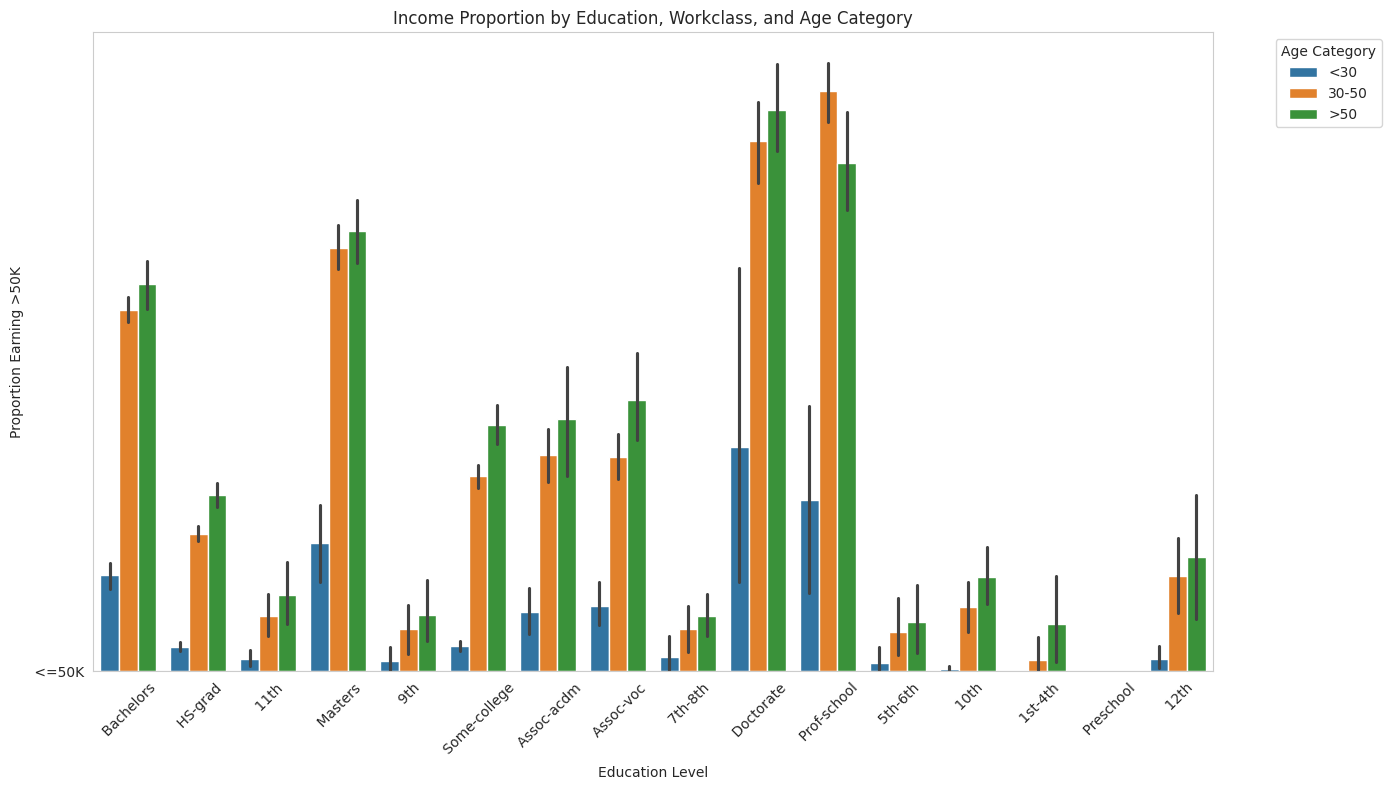

In [150]:
#Question 5
#Aggregation1:Demographic and Socioeconomic Status Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]
df_new4 = pd.read_csv(url, header=None, names=columns, na_values=' ?')
df_new4.head()
demographic_agg=df_new4
#demographic_agg is the DataFrame and the 'Age' column is numeric
# Categorize 'Age' into bins
bins = [0, 30, 50, np.inf]
labels = ['<30', '30-50', '>50']
demographic_agg['Age_Category'] = pd.cut(demographic_agg['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=demographic_agg, x='education', y='income', hue='Age_Category')
plt.gca().invert_yaxis()
plt.title('Income Proportion by Education, Workclass, and Age Category')
plt.ylabel('Proportion Earning >50K')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The Higher the education level the probabilty to have higher income in higher

---



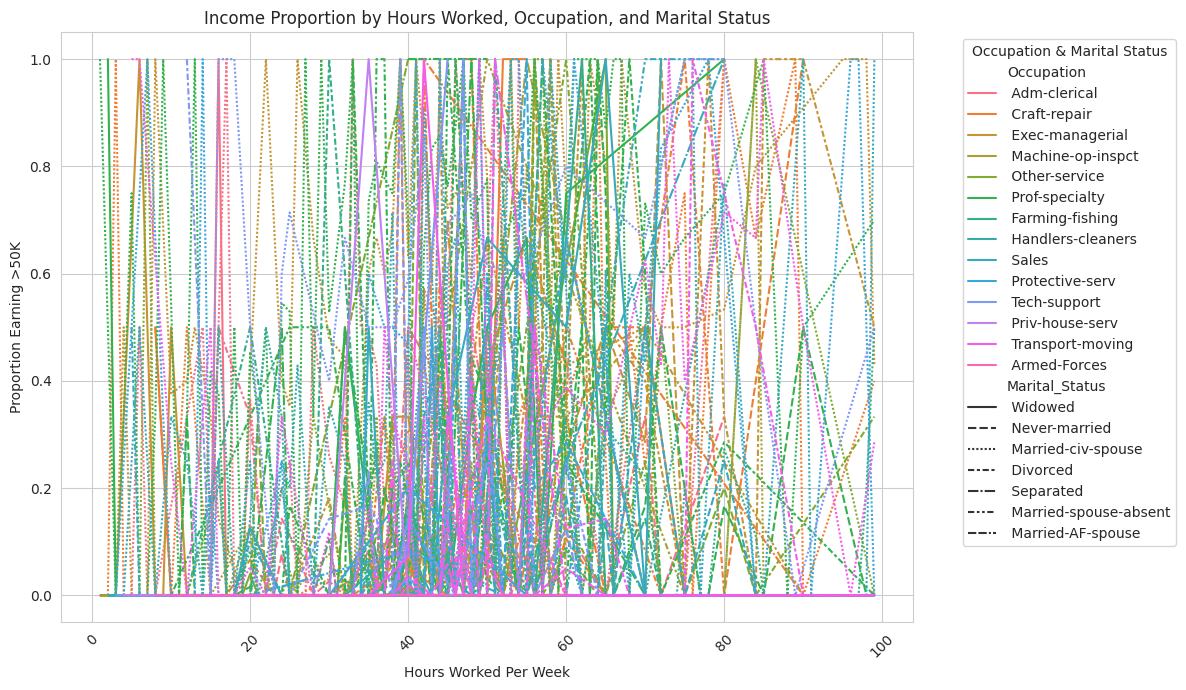

In [153]:
#Question 5
#Aggregation2: Work-Life Balance Visualization
#work_life_balance_agg has the below columns:
# Hours_Per_Week_Bin, Occupation, Marital_Status, Income_Binary
#Assign column names for plotting
work_life_balance_agg.columns = ['Hours_Per_Week_Bin', 'Occupation', 'Marital_Status', 'Income_Binary']

plt.figure(figsize=(12, 7))
sns.lineplot(data=work_life_balance_agg, x='Hours_Per_Week_Bin', y='Income_Binary', hue='Occupation', style='Marital_Status')
plt.title('Income Proportion by Hours Worked, Occupation, and Marital Status')
plt.ylabel('Proportion Earning >50K')
plt.xlabel('Hours Worked Per Week')
plt.xticks(rotation=45)
plt.legend(title='Occupation & Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

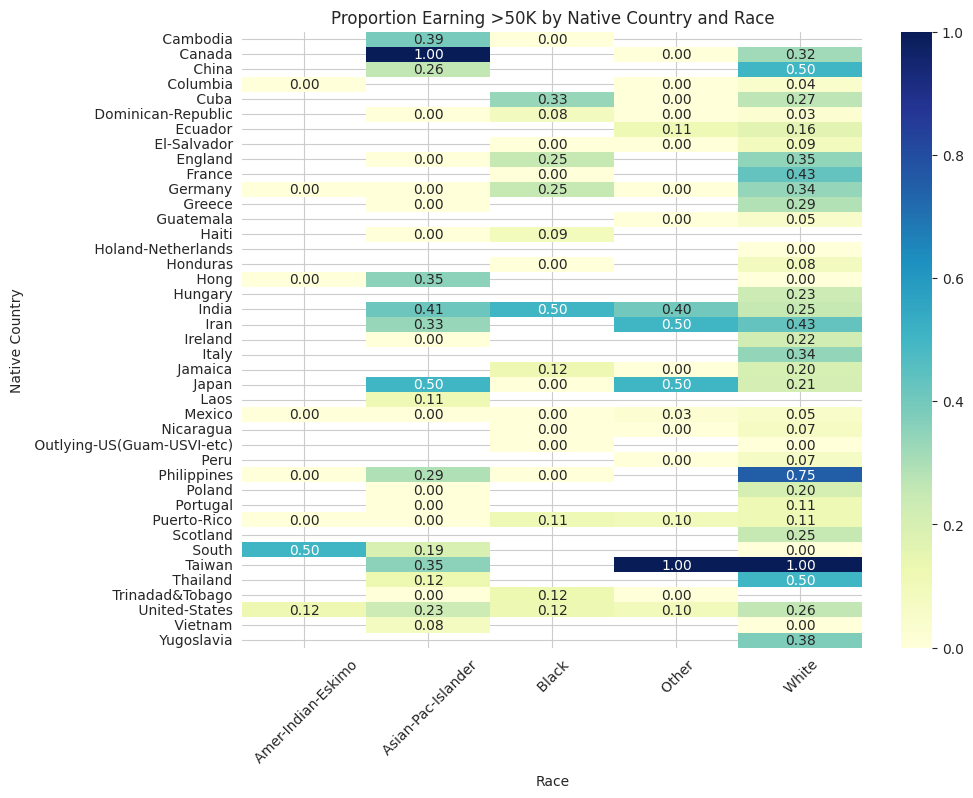

In [18]:
#Question 5
#Aggregation3: Geographic Visualization
#geographic_agg has the below columns:
#native country and race
#Assign column names for plotting
geographic_pivot = geographic_agg.pivot(index='N_country', columns='race', values='Income_Binary')

plt.figure(figsize=(10, 8))
sns.heatmap(geographic_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Proportion Earning >50K by Native Country and Race')
plt.ylabel('Native Country')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

So you might get an income >50K no mater what your race or gender

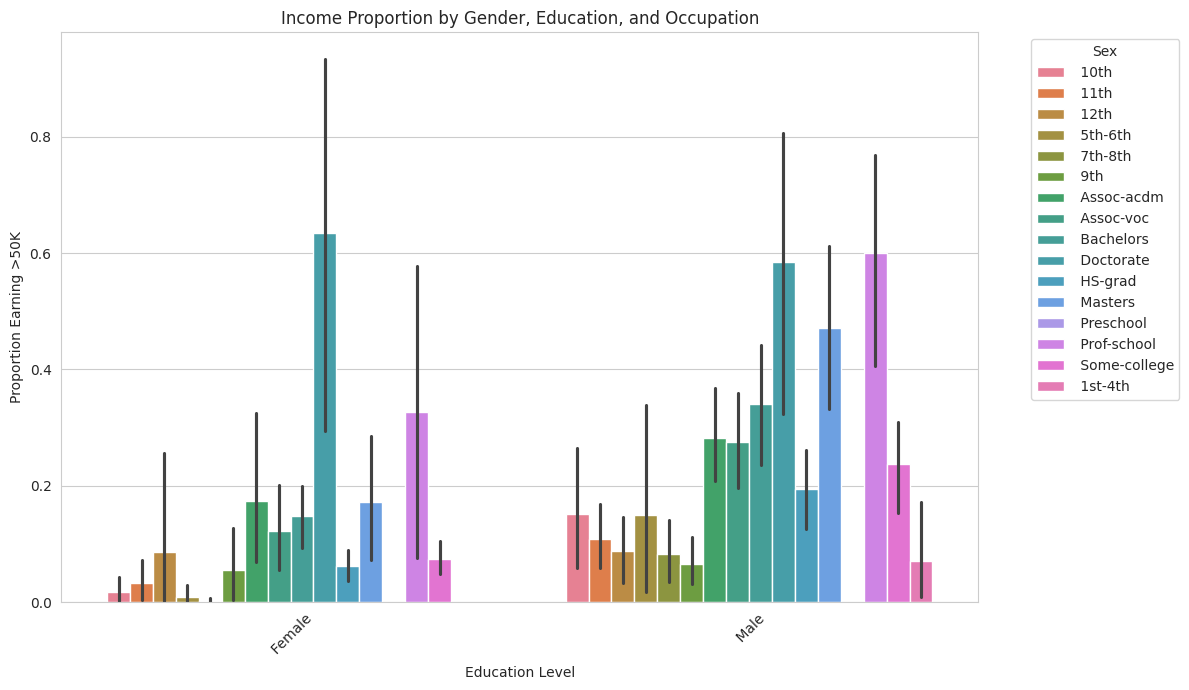

In [20]:
#Question 5
#Aggregation4: Gender Disparity Visualization
#gender disparity aggregation columns are sex, education, and occupation.
gender_disparity_agg.columns = ['Education', 'Occupation', 'Sex', 'Income_Binary']

plt.figure(figsize=(12, 7))
sns.barplot(data=gender_disparity_agg, x='Education', y='Income_Binary', hue='Sex', dodge=True)
plt.title('Income Proportion by Gender, Education, and Occupation')
plt.ylabel('Proportion Earning >50K')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [177]:
#Question6
#For each column in the dataset:
#a. (Using Python) Develop a module that implements ways by which this column can be engineered in a manner that exposes
#clearer trends in the data, and that abides by requirements for the various ML models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [191]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "work_class", "fnlwgt", "education", "edu_num", "M_status",
           "occupation", "relationship", "race", "sex", "capital_G", "capital_L",
           "H_per_week", "N_country", "income"]
df = pd.read_csv(url, header=None, names=columns, na_values=' ?')

In [192]:
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [212]:
# dropping all rows that have NAs in any of their values
print('shape of df - before dropping NAs: {}'.format(df.shape))
df = df.dropna()
print('shape of df - after dropping NAs: {}'.format(df.shape))

shape of df - before dropping NAs: (32561, 15)
shape of df - after dropping NAs: (30162, 15)


In [181]:
name2newname = {col: 'var_{}'.format(i) for i, col in enumerate(df.columns) if col != 'income'}
df = df.rename(columns=name2newname)
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [182]:
# Split the data between input variables, X, and output/target variable, y.
X = df.loc[:, df.columns != 'income']
y = df.loc[:, df.columns == 'income']

print(X.shape)
print(y.shape)

(30162, 14)
(30162, 1)


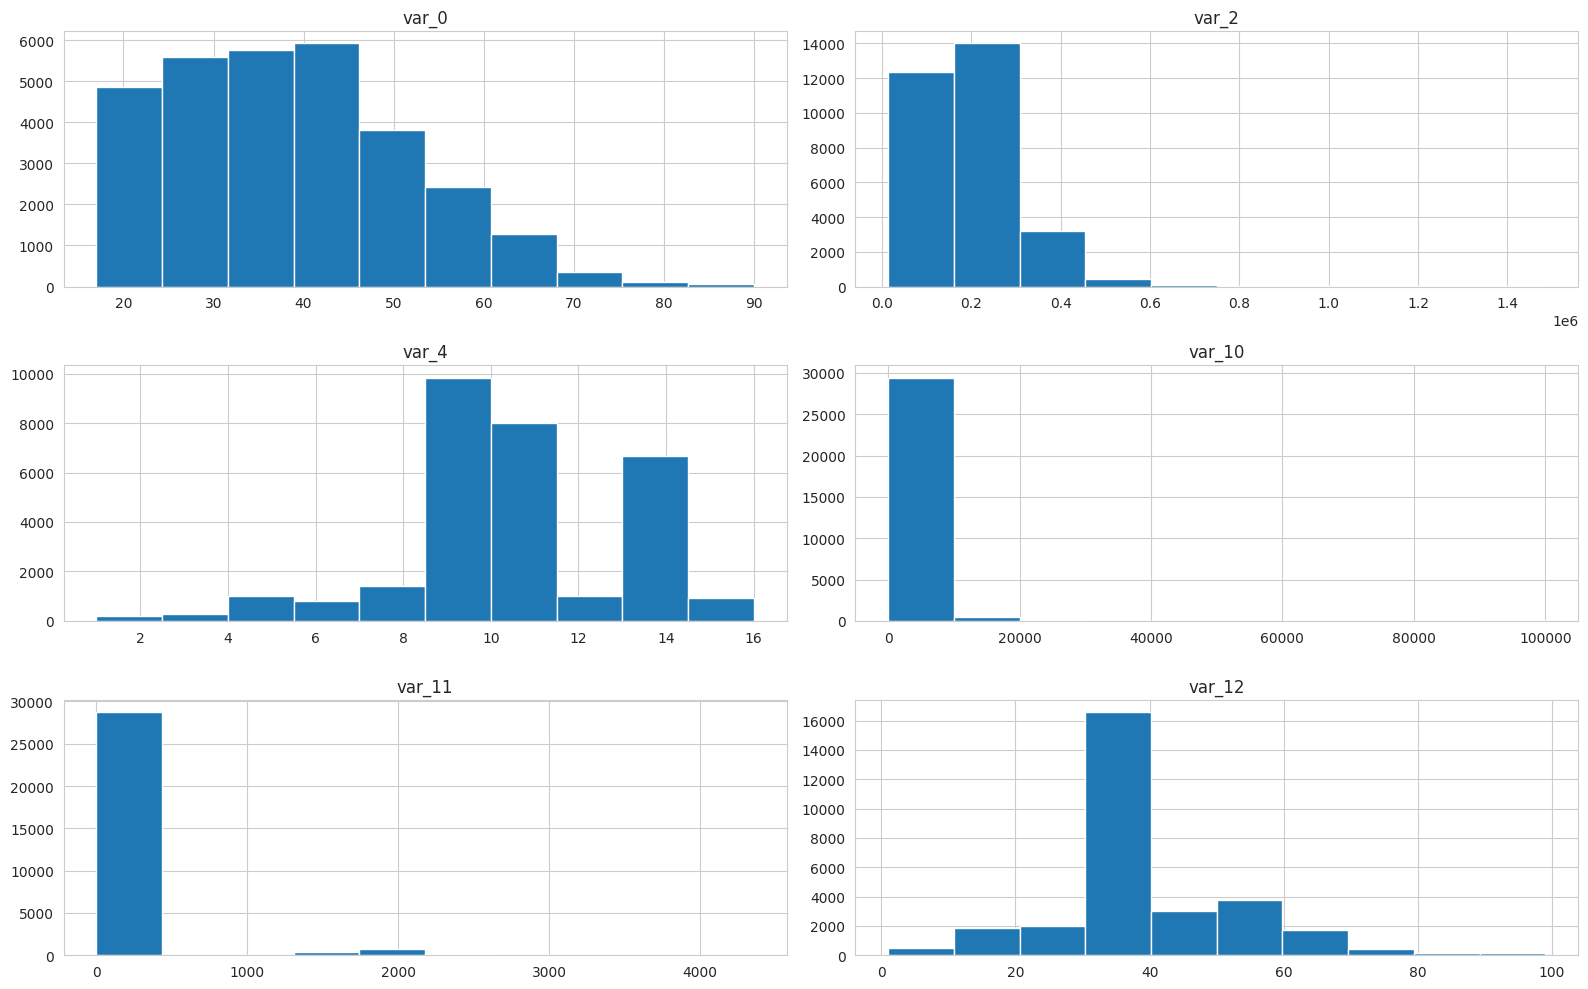

In [169]:
#Power Transforms - Make Distributions More Gaussian
c = ['var_0','var_2','var_4','var_10','var_11','var_12']
fig = X[c].hist()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.tight_layout()

In [43]:
#We will use Gaussian for var_12 which is "Hours per Week"(Numerical variable) where its data is approximately Normally
#distributed

In [183]:
#Box-Cox Transform for var_12 (numerical) - "Hours per Week"
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
C=['var_12']
pipe = Pipeline(steps=[('min-max', MinMaxScaler(feature_range=(1,2))), ('box-cox', PowerTransformer(method='box-cox'))])

X_trans = pipe.fit_transform(X[C])

In [184]:
# transform X back to a data frame
X_trans_df = pd.DataFrame(X_trans, columns=C)
X_trans_df.head()

,var_12
0,-0.057833
1,-2.434752
2,-0.057833
3,-0.057833
4,-0.057833


In [185]:
#update the variable 12 column
X = pd.DataFrame(X)
X['var_12']=X_trans_df
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,-0.057833,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,-2.434752,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,-0.057833,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,-0.057833,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,-0.057833,Cuba


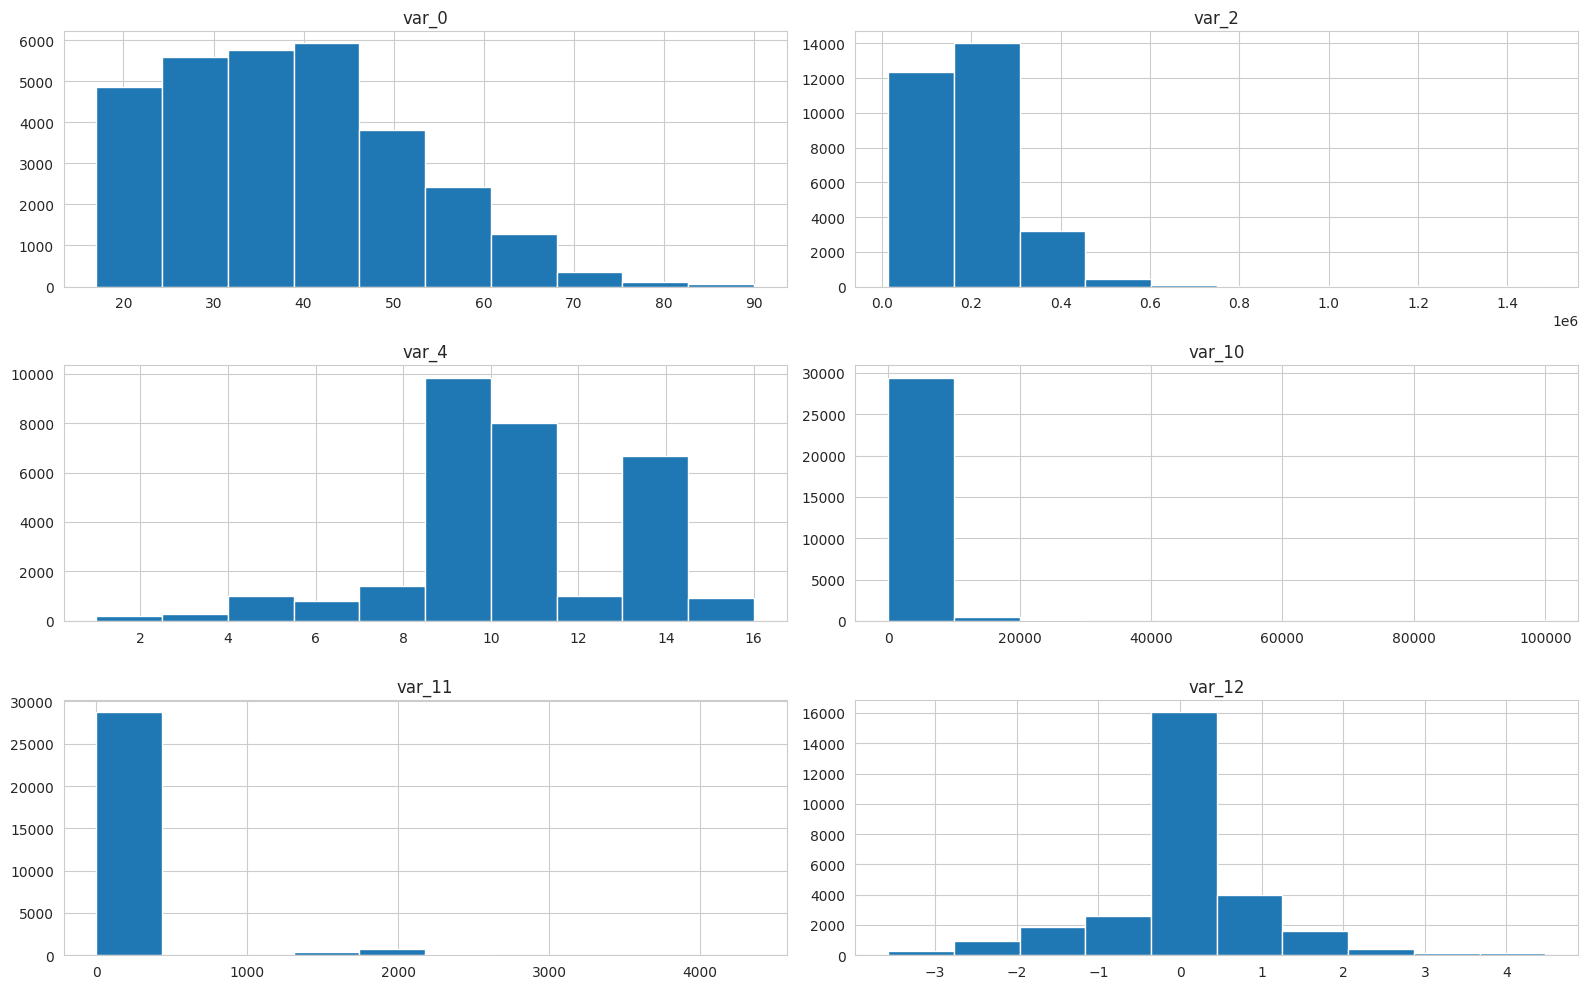

In [186]:
#note only var12 is transformed
fig = X[c].hist()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.tight_layout()

In [187]:
#Method: K-Means Discretization Transform #Used for the numerical column Age (var_0)
#group them into 3 categories
from sklearn.preprocessing import KBinsDiscretizer
C=['var_0']
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
X_trans = trans.fit_transform(X[C])
X_trans_df = pd.DataFrame(X_trans)

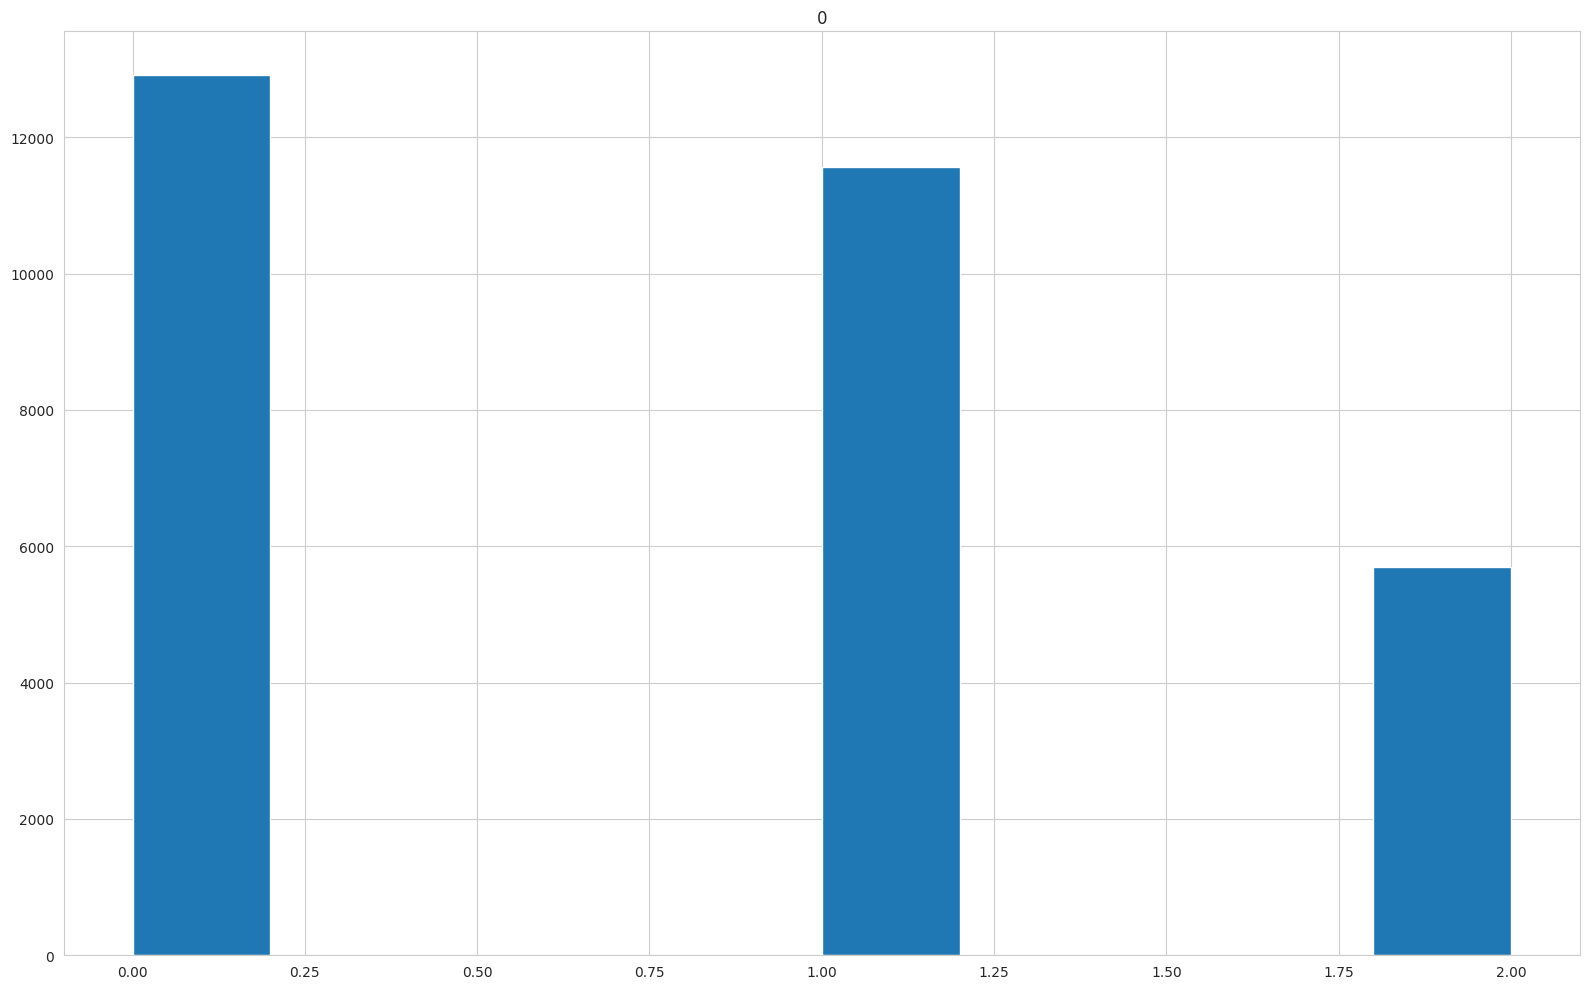

In [188]:
fig = X_trans_df.hist()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.tight_layout()

In [190]:
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
#Encoding Categorical Data
# create a dummy dataframe with a mix of column types (categorical and ordinal)
#Encoding Categorical Data 
#Method: Encoding Using LabelEncoder()

#Variable"Occupation"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['occupation'] = le.fit_transform(df.occupation)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [195]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "workclass"
df['work_class'] = le.fit_transform(df.work_class)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,4,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,2,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,2,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,2,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,2,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,>50K
32558,58,2,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,2,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [196]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "education"
df['education'] = le.fit_transform(df.education)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,4,83311,9,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,2,215646,11,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,2,234721,1,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,2,338409,9,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,2,154374,11,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,>50K
32558,58,2,151910,11,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,2,201490,11,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [197]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "marital_status"
df['M_status'] = le.fit_transform(df.M_status)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,4,83311,9,13,2,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,2,215646,11,9,0,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,2,234721,1,7,2,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,2,338409,9,13,2,9,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,2,154374,11,9,2,6,Husband,White,Male,0,0,40,United-States,>50K
32558,58,2,151910,11,9,6,0,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,2,201490,11,9,4,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [198]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "relationship"
df['relationship'] = le.fit_transform(df.relationship)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,White,Male,2174,0,40,United-States,<=50K
1,50,4,83311,9,13,2,3,0,White,Male,0,0,13,United-States,<=50K
2,38,2,215646,11,9,0,5,1,White,Male,0,0,40,United-States,<=50K
3,53,2,234721,1,7,2,5,0,Black,Male,0,0,40,United-States,<=50K
4,28,2,338409,9,13,2,9,5,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,White,Female,0,0,38,United-States,<=50K
32557,40,2,154374,11,9,2,6,0,White,Male,0,0,40,United-States,>50K
32558,58,2,151910,11,9,6,0,4,White,Female,0,0,40,United-States,<=50K
32559,22,2,201490,11,9,4,0,3,White,Male,0,0,20,United-States,<=50K


In [199]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "race"
df['race'] = le.fit_transform(df.race)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,Male,2174,0,40,United-States,<=50K
1,50,4,83311,9,13,2,3,0,4,Male,0,0,13,United-States,<=50K
2,38,2,215646,11,9,0,5,1,4,Male,0,0,40,United-States,<=50K
3,53,2,234721,1,7,2,5,0,2,Male,0,0,40,United-States,<=50K
4,28,2,338409,9,13,2,9,5,2,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,Female,0,0,38,United-States,<=50K
32557,40,2,154374,11,9,2,6,0,4,Male,0,0,40,United-States,>50K
32558,58,2,151910,11,9,6,0,4,4,Female,0,0,40,United-States,<=50K
32559,22,2,201490,11,9,4,0,3,4,Male,0,0,20,United-States,<=50K


In [200]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "sex"
df['sex'] = le.fit_transform(df.sex)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,United-States,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,United-States,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,United-States,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,United-States,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,United-States,<=50K
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,United-States,>50K
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,United-States,<=50K
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,United-States,<=50K


In [201]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "native_country"
df['N_country'] = le.fit_transform(df.N_country)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


In [202]:
#Encoding Categorical Data #Method: Encoding Using LabelEncoder()
#Variable "income"
df['income'] = le.fit_transform(df.income)
df

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


All Catagorical Columns were Encoded

In [203]:
#update column or variable 12 "Hours per week" to Gaussian
df['H_per_week']=X['var_12']
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,-0.057833,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,-2.434752,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,-0.057833,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,-0.057833,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,-0.057833,4,0


In [ ]:
#Question 6 part b
#b. When working on (6.a) above, describe your choice of feature engineering per column, whilst making the distinction
#between categorical and numerical columns, as well as to choose feature engineering strategies that are justified by
#the underlying data distributions when applicable, or feature interactions.

#Columns with Numerical Data: "Hours Per Week" (var_12)
#1. Power Transformation – Used on variables var_ 0,2,4,10,11, and 12 which are
#Age, fnlwgt, education num, capital gain, capital loss, and hours per week.
#The result that we got is that only the distribution of var_12 which is Hours Per Week is approximately Normal or Gaussian.
#Rationale: The goal of power transformations, like the Box-Cox transformation, is to approximate Gaussian distribution
#for the data. This is useful because symmetric and bell-shaped feature distributions improve the performance of many
#machine learning models, particularly linear models and algorithms that presume normality.
#Box-Cox Transformation: Only positive data can be transformed using this power transformation.
#Note that all our values in the dataset are positive, so this method can be applied in our case.
#Application: For "hours per week," little departures from normalcy (such as skewness) might still affect
#the performance of the model, even if the distribution is roughly normal.
#By stabilizing variance and reducing skewness, the Box-Cox transform can improve model accuracy.

#2. Discretization Using K-Means – Used for the Age feature
#Rationale: Discretization divides numerical data into categories, frequently by dividing it into groups.
#The K-means clustering technique is used in K-means discretization to identify bin edges that reduce within-bin variances.
#This may highlight nonlinear connections between the target and the feature.
#Application: K-means discretization can be used to divide data into meaningful groups that a model can use more readily,
#especially for numerical variables where you suspect complex, nonlinear impacts on the outcome.
#Categorical Columns:
#3. Label Encoding Method:
#Applied on categorical columns: occupation, workclass, education, marital status, relationship, race, sex, native country, 
#and income.
#Rationale: Categorical variables must be changed because many machine learning models demand numerical input.
#With label encoding, every variable category is given a distinct number. Although it is simple, it implicitly assumes a
#hierarchy among the categories, which may not always be suitable.
#Application: In tree-based models, which can manage the numerical nature of the encoded data without assuming an
#underlying order, apply to ordinal data or categorical variables. One-hot encoding or other methods that do not necessitate
#order should be taken into consideration for nominal data in the absence of intrinsic order.
#Rationale and Selection of Strategy:
#- Distribution-Based Transformations: Knowing the distribution is essential when working with numerical data.
#To improve model compatibility, skewness is addressed, and distributions are normalized using power transformations
#such as Box-Cox.
#- Discretization and K-means: Used when numerical data may have a complicated relationship with the target,
#simplifying the link through categorization facilitates model learning.
#- Categorical Encoding: Depending on the model being utilized and the type of categorical data (nominal vs. ordinal),
#one-hot encoding or label encoding should be used. Label encoding is less complex and requires less memory,
#but it implies an order, hence it is appropriate for models based on trees or ordinal data.
#In summary, every technique is chosen in accordance with the particulars of the data and the demands of the next
#modeling phase, with the goal of optimizing model performance through the improvement of data consistency with model
#assumptions or the simplification of intricate relationships within the data.

In [127]:
#Question 7
#Implement two feature selection methods on your “cleaned” and “engineered” dataset.
#At this stage, pay special attention if the data requires further processing (e.g., scaling).
#Feature Selection
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [207]:
# check if there are any misisng values in any column
df.isnull().sum()

Age             0
work_class      0
fnlwgt          0
education       0
edu_num         0
M_status        0
occupation      0
relationship    0
race            0
sex             0
capital_G       0
capital_L       0
H_per_week      0
N_country       0
income          0
dtype: int64

We deleted previously all null rows

In [129]:
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [131]:
# take all columns except the target variable
considered_features = [col for col in df.columns if col != 'income']
compute_vif(df, considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
7,relationship,1.674666
9,sex,1.567708
4,edu_num,1.208485
0,Age,1.158915
3,education,1.147048
12,H_per_week,1.132425
5,M_status,1.128125
8,race,1.034846
13,N_country,1.030730
10,capital_G,1.029174


In [132]:
#VIF values are all less than 5 which indicate no Multicollinearity between all features

In [134]:
#Detecting Interdependence between Categorical Variables - NMI
from sklearn.metrics.cluster import normalized_mutual_info_score

print(normalized_mutual_info_score(df['edu_num'], df['education']))

1.0


This means Education number and education are similar

In [137]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print(normalized_mutual_info_score(df['Age'], df['work_class']))

0.015474312420075641


In [138]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print(normalized_mutual_info_score(df['occupation'], df['M_status']))

0.029506330568301667


In [139]:
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [140]:
#Question 7 Feature Selection
#Method1: Recursive Feature Elimination (RFE)
# we will use our encoded data generated before df, all nan rows were deleted
df.head()

,Age,work_class,fnlwgt,education,edu_num,M_status,occupation,relationship,race,sex,capital_G,capital_L,H_per_week,N_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [141]:
# Split the data into X and y
X = df.loc[:, df.columns != 'income']
y = df.loc[:, df.columns == 'income']
print(X.shape)
print(y.shape)

(30162, 14)
(30162, 1)


In [142]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24129, 14)
(24129, 1)
(6033, 14)
(6033, 1)


In [143]:
# Apply Min-Max Scaling to training and testing datasets in a proper way that avoids data leakage
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

NUM_FEATURES_RFE = 7
model = DecisionTreeRegressor()
feature_names = [col for col in df.columns if col != 'income']

In [146]:
selector = RFE(estimator=model, n_features_to_select=NUM_FEATURES_RFE)
fit = selector.fit(X_train, y_train)

# Getting Feature rankings and names and selected features
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
selected = []
for i in range(len(fit.support_)):
    if fit.support_[i]:
        selected.append(feature_names[i])
print('Selected Features: ', selected)

Num Features: 7
Selected Features: [ True False  True False  True False  True  True False False  True False
  True False]
Feature Ranking: [1 2 1 6 1 7 1 1 4 8 1 3 1 5]
Selected Features:  ['Age', 'fnlwgt', 'edu_num', 'occupation', 'relationship', 'capital_G', 'H_per_week']


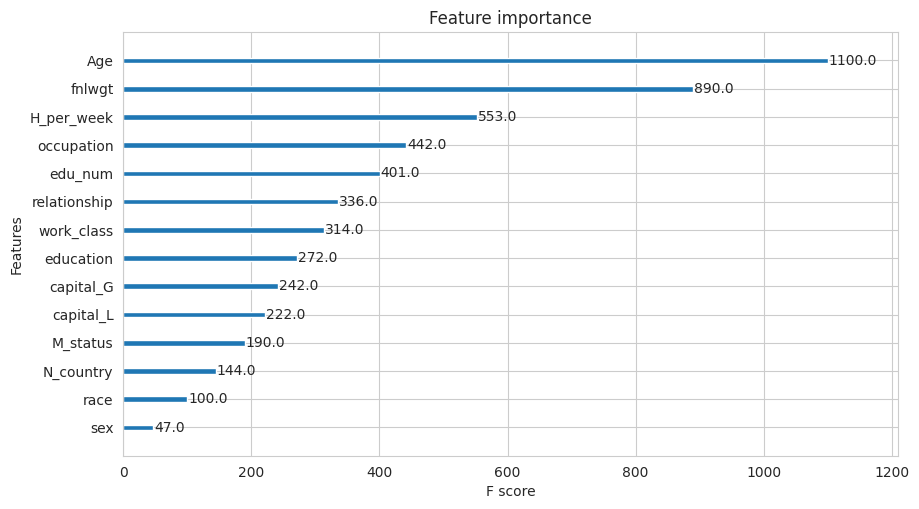

In [147]:
#Method2: XGBoost Feature Importance
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

model_xgb = XGBRegressor() # initialize the model
model_xgb.fit(pd.DataFrame(X_train, columns=feature_names), y_train) # train the model

xgb.plot_importance(model_xgb)
fig = plt.gcf()
fig.set_size_inches(10, 5.5)

In [ ]:
#Question 8. Elaborate whether the rankings of important features produced by those two methods align with what
#we know about the problem you are tackling in your chosen dataset. Those interpretations can be standalone
#interpretations (e.g., does common sense or domain expertise confirm that a given feature is important),
#or coupled interpretations that align with the EDA performed in parts 3 and 4 above.

#Method1:
#Results from Method 1 in Question 7 which uses RFE of the training data, using DecisionTreeRegressor() ,7 features were
#selected which are: ['Age', 'fnlwgt', 'edu_num', 'occupation', 'relationship', 'capital_G', 'H_per_week']
# Regarding the results, it is convincing since those are the most important feature to determine the income of the person.
#Race, sex, and native country features don't really play a role in predicting the income of the person 
#(there were looked into in our analysis in part 3,4 and visualized in 5)
# All genders might highly make more that 50K per year from analysis in question 3 and 4
#regarding race from the dataset as seen below, the data collected include more white race and most of them have an education
#level equivalent and higher than Highschool level (kindly check the bar graph below)

#education is same as education num, so the education can be deleted (correlated)
#marital-status and relationship are highly related and will eventualy play exactly the same role (check below)

#Method 2:
#Results from Method 2 in Question 7 which uses XGBoost Feature Importance, the most important 7 features were
#Age, fnlwgt,H_per_week,occupation, edu_num,relationship,working class

# comparing both methods all selected features are similar except one,
#in method 1 education feature was selected while in method 2 working class feature was selected
# In general when a person receives a higher education, usually reach for example masters and phd levels
#usually work in managerial positions (can be seen in the below bar graph as well).
#so choosing one of them is acceptable.

In [160]:
from sklearn.metrics.cluster import normalized_mutual_info_score
# check the correlation between relationship and marital status
print(normalized_mutual_info_score(df['relationship'], df['M_status']))

0.5249037668258572


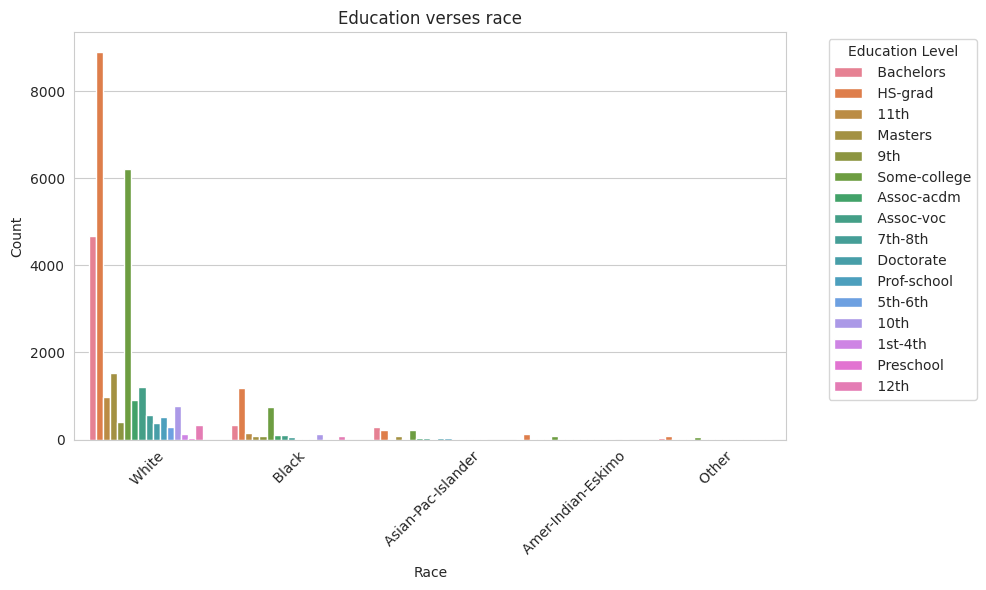

In [155]:
# checking the education level of different races
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='education', data=df)
plt.title('Education vs race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

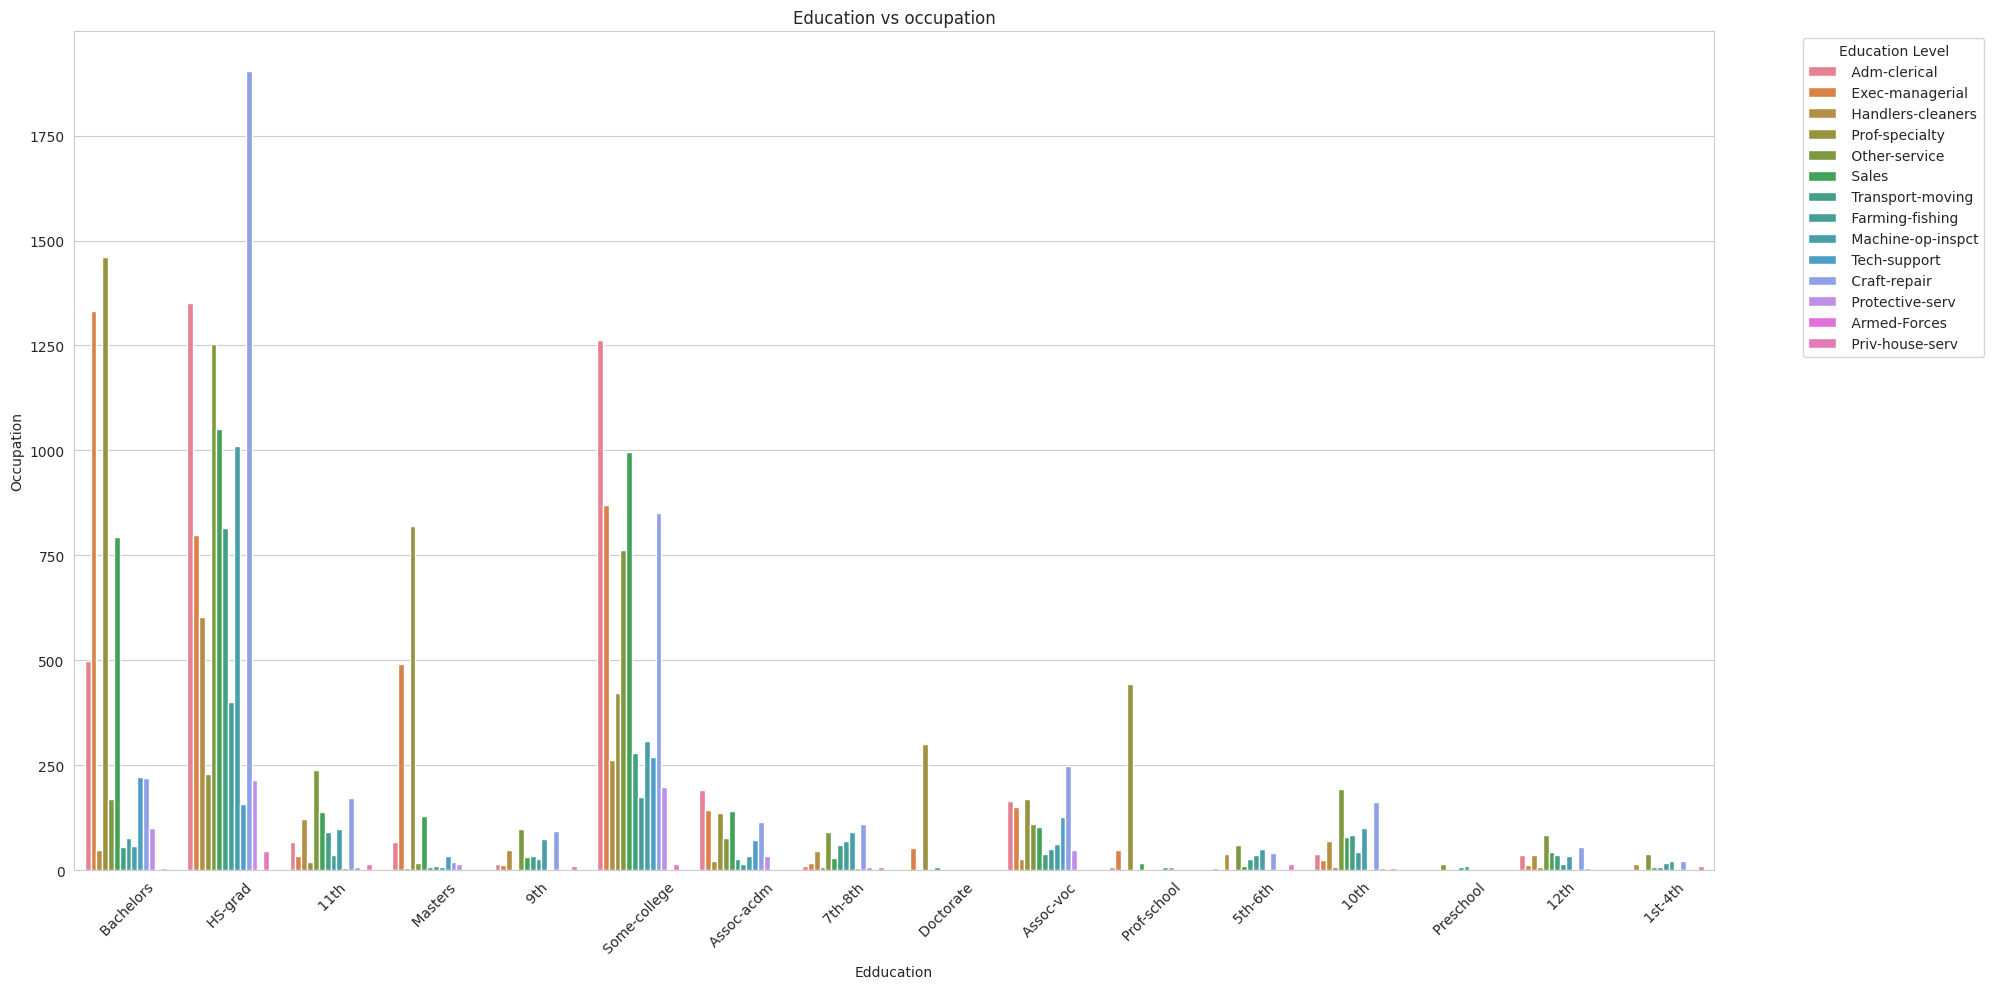

In [220]:
# checking the education level of different occupations
plt.figure(figsize=(20, 10))
sns.countplot(x='education', hue='occupation', data=df)
plt.title('Education vs occupation')
plt.xlabel('Edducation')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()